In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

bordeaux = pd.read_csv('bordeaux.csv', delimiter=';')

# A
subset = bordeaux[['temperature', 'sun', 'heat', 'rain', 'quality']].copy()
subset.dropna(inplace=True)
subset = subset.reset_index()  # ifnotimpact on evaluationmetrics
x = subset[['temperature', 'sun', 'heat', 'rain']]
y = subset['quality']
lda = LinearDiscriminantAnalysis()
lda.fit(x, y)


predicted = pd.Series(lda.predict(x), name='predicted')
# Also change this
actual = subset['quality'].rename('actual')
pd.crosstab(index=actual, columns=predicted,
            margins='all', margins_name='total')


predicted  bad  good  medium  total
actual                             
bad         10     0       2     12
good         0     9       2     11
medium       1     2       8     11
total       11    11      12     34

In [3]:
"""
Exercise 1: Look for the dataset bordeaux on Canvas and place it in a dataframe.
FYI:
a.  Apply a discriminant analysis to this data set where quality acts as a dependent
    variable and temperature, sun, heat and rain as the independent variables.
b.  How many dimensions does the discriminant analysis have?
c.  Make a plot of the results of the discriminant analysis. What is being visualized here?
d.  Apply the predict command to the original data. How many percent of the wines get
    the same label assigned through the discriminant analysis as observed?
"""

from sklearn.metrics import classification_report# print(accuracy_score(y, lda.predict(x), normalize=False)/len(bordeaux))
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

bordeaux = pd.read_csv('bordeaux.csv', delimiter=';')

# A
subset = bordeaux[['temperature', 'sun', 'heat', 'rain', 'quality']].copy()
subset.dropna(inplace=True)
subset = subset.reset_index()  # ifnotimpact on evaluationmetrics
x = subset[['temperature', 'sun', 'heat', 'rain']]
y = subset['quality']
lda = LinearDiscriminantAnalysis()
lda.fit(x, y)


# B
# 2 dimensions
def calculateDimensions(numbPossibleValues, numbIndValues):
    return print(min(numbPossibleValues-1, numbIndValues))

calculateDimensions(3, 4)
    


# C
LD = lda.transform(x)

LD_df = pd.DataFrame(
    zip(LD[:, 0], bordeaux['quality']), columns=['LD1', 'Target'])
LD_df2 = pd.DataFrame(
    zip(LD[:, 1], bordeaux['quality']), columns=['LD1', 'Target'])


colorPalette = LD_df
colorPalette['Target'].loc[(colorPalette['Target'] == 'good')] = 'green'
colorPalette['Target'].loc[(colorPalette['Target'] == 'medium')] = 'orange'
colorPalette['Target'].loc[(colorPalette['Target'] == 'bad')] = 'red'


def plot_step_lda():
    ax = plt.subplot(111)
    dfRowSize = len(LD)
    for _ in range(dfRowSize):
        plt.scatter(x=LD[:, 0],
                    y=LD[:, 1],
                    marker='o',
                    color=colorPalette.iloc[:, 1],
                    alpha=0.5,
                    )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Results of the discriminant analysis')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",
                    labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

    plt.grid()
    plt.tight_layout()
    plt.show()


plot_step_lda()

# D
def printAccuracyLDA(original, predicted):
    #Original and predicted are still the same size of the original dataframe
    return(accuracy_score(original, predicted, normalize=False)/len(original))

print(printAccuracyLDA(y, lda.predict(x)))



C:\Users\Ruben\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
No handles with labels found to put in legend.


2


0.7941176470588235


<Figure size 432x288 with 0 Axes>

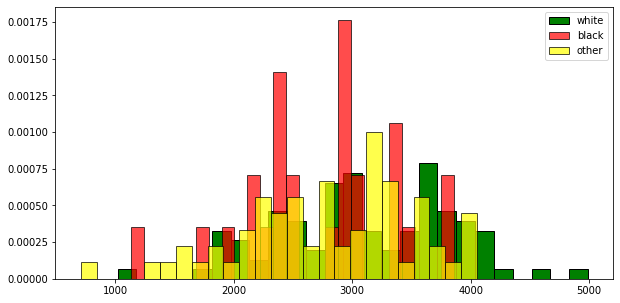

In [4]:
birthwt = pd.read_csv(
    ' .csv', delimiter=';')

"a"
birthwt.describe()

"b"
# any categorical fields can be a dependent variable (race, low, bwt)

"c"
# continuous, normally distributed, linear, non-correlated fields
# can be used as independent variables

"d"
X2 = birthwt[['bwt', 'age', 'ftv']].copy()
y2 = birthwt['race'].copy()
lda.fit(X2, y2)

"e"
# 2-dimension(based on my variable selection)

"f"
LD = lda.transform(X2)
b_df = pd.DataFrame(zip(LD[:, 0], ))
plt.figure()
colors = ['purple', 'purple', 'purple', 'purple', 'purple',
          'purple', 'purple', 'purple', 'purple', 'purple']
birthwt.hist(column=['bwt'], by='race', bins=25, density=True,
             edgecolor='black', color=colors, sharex=True, sharey=True, figsize=(10, 10), layout=(3, 1))
fig, ax = plt.subplots(figsize=(10, 5))
birthwt['bwt'][birthwt['race'] == 1].hist(ax=ax, bins=25, density=True,
                                          edgecolor='black', color='green', label='white')
birthwt['bwt'][birthwt['race'] == 2].hist(ax=ax, bins=25, density=True,
                                          edgecolor='black', color='red', alpha=0.7, label='black')
birthwt['bwt'][birthwt['race'] == 3].hist(ax=ax, bins=25, density=True,
                                          edgecolor='black', color='yellow', alpha=0.7, label='other')
ax.legend()
ax.grid(False)
plt.show()


In [5]:
"""
Exercise 3: Look for the dataset Cars93 on Canvas and place it in a dataframe.
FYI:
a)  Analyze the type of data in this dataset.
b)  Split the data set into two: the first 90 rows as a ‘training data set' why you are going
    to apply a discriminant analysis (see e) and the last 3 rows to check whether the
    obtained discriminant analysis places these cars in the correct class (see g).
c)  Which columns can be used as a dependent variable for a discriminant analysis?
d)  Which columns can be used as independent variables for a discriminant analysis?
e)  Apply a discriminate analysis to this data set. As a dependent variable, take the Type
    column and as independent variables all usable columns (see d).
f)  How many dimensions does the discriminant analysis have?
g)  Apply the obtained discriminat analysis using predict command to the last 3 rows of
    the original data (see b). Are all 3 cars placed in the correct class?
"""

import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

cars = pd.read_csv('Cars93.csv', delimiter=";", decimal=".").fillna(0)
cars.info()

# B
carsTest = cars.iloc[:90, :]
carsTail = cars.iloc[90:, :]

# C
# Anything that isn't a number (cilinder)
# Manufacturer, Model, Type, Airbags, DriveTrain, Man.trans.avail, origin, make and also Cylinders.

# D
# Anything that is a number
# Min.Price, Price, Max.Price, MPG.city, MPG.highway,
# EngineSize, Horsepower, RPM, Rev.per.mile, Fuel.tank.capacity, Passengers, Length,
# Wheelbase, Width, Turn.circle, Rear.seat.room, Luggage.room, Weight

# E
x = carsTest[['Weight', 'Luggage.room', 'Rear.seat.room', 'Turn.circle', 'Width', 'Wheelbase', 'Length', 'Passengers', 'Fuel.tank.capacity', 'Rev.per.mile', 'RPM', 'Horsepower', 'EngineSize', 'MPG.highway', 'MPG.city', 'Max.Price', 'Price', 'Min.Price']].copy()
y = carsTest['Type'].copy()

lda = LinearDiscriminantAnalysis()
lda.fit(x, y)

# F
def calculateDimensions(numbPossibleValues, numbIndValues):
    return print(min(numbPossibleValues-1, numbIndValues))

calculateDimensions(6, 18)

# G
# Check next code block



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [6]:
#fillna used to get the same answers
cars = pd.read_csv('Cars93.csv', delimiter=';', decimal='.').fillna(0)
print(len(cars))

#a. Analyze the type of data in this dataset.
#cars.describe()

#b. Split the data set into two: the first 90 rows as a ‘trainingdata set' why you are going to apply a discriminant analysis (see e) and the last 3 rows to check whether the obtained discriminant analysis places these cars in the correct class (see g).
cars1 = cars.iloc[:90,:]
cars2 = cars.iloc[90:,:]
print(cars2)

#print(cars1.tail)
#print(cars2)

#c. Which columns can be used as a dependent variable for a discriminant analysis?
#any of the qualitative variables: Manufacturer, Model, Type, Airbags, DriveTrain, Man.trans.avail, origin, makeand also Cylinders.

#d. Which columns can be used as independent variables for a discriminant analysis?
#all of thequantitative variables:  Min.Price, Price, Max.Price, MPG.city, MPG.highway, EngineSize, Horsepower, RPM, Rev.per.mile, Fuel.tank.capacity, Passengers, Length, Wheelbase, Width, Turn.circle, Rear.seat.room, Luggage.room, Weight

#e. Apply a discriminate analysis to this data set. As a dependent variable, take the Type column and as independent variables all usable columns (see d).
x = cars1[['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight']]
y = cars1['Type']

lda = LinearDiscriminantAnalysis()
lda.fit(x,y)

#f. How many dimensions does the discriminant analysis have?
print(calculateDimensions(6, 18))

#g. Apply the obtained discriminat analysis using predict command to the last 3 rows of the original data (see b). Are all 3 cars placed in the correct class?
testPrediction = cars2[['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight']]
print(printAccuracyLDA(cars2['Type'], lda.predict(testPrediction)))
print(lda.predict(testPrediction))

93
   Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
90   Volkswagen  Corrado   Sporty       22.9   23.3       23.7        18   
91        Volvo      240  Compact       21.8   22.7       23.5        21   
92        Volvo      850  Midsize       24.8   26.7       28.5        20   

    MPG.highway             AirBags DriveTrain  ... Passengers  Length  \
90           25                None      Front  ...          4     159   
91           28         Driver only       Rear  ...          5     190   
92           28  Driver & Passenger      Front  ...          5     184   

    Wheelbase  Width  Turn.circle Rear.seat.room  Luggage.room  Weight  \
90         97     66           36           26.0          15.0    2810   
91        104     67           37           29.5          14.0    2985   
92        105     69           38           30.0          15.0    3245   

     Origin                Make  
90  non-USA  Volkswagen Corrado  
91  non-USA           Volvo 24